## Table of Contents
1. Importing the packages
* Reading dataset from yahoo
* Exploring the data
* Importing more packages for prediction
* Train Test Split
* Building the model
* Prediction on ts_test
* Prediction with Test data

In [1]:
# Reading Data
import pandas_datareader as pdr

# Data Manipulation
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

2. Reading the dataset

In [3]:
# Reading Data
#import pandas_datareader as pdr
import pandas_datareader as pdr
# Data Manipulation
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install yfinance --upgrade --no-cache-dir

In [5]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [7]:
# get_data_yahoo(inst_ticker, start_date, end_date)
df = pdr.get_data_yahoo('TSLA',start='2010-06-29', end='2020-04-18')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


We require ony 2 columns: Date and Close

In [8]:
df1=df['Close']  # new_df contains only the required columns
df2 = df1.sort_index(axis=0,ascending = False)
df3 = pd.DataFrame(df2,columns = ['Close'])
df3

,Close
Date,
2020-04-17,50.259335
2020-04-16,49.680668
2020-04-15,48.655334
2020-04-14,47.326000
2020-04-13,43.396667
...,...
2010-07-06,1.074000
2010-07-02,1.280000
2010-07-01,1.464000


In [9]:
stocks_df = df3[7:]
Test_data = df3[:7]     #This has data for 7 days from 2020-04-17 to 2020-04-08
stocks_df.head()

,Close
Date,
2020-04-07,36.363335
2020-04-06,34.416000
2020-04-03,32.000668
2020-04-02,30.298000
2020-04-01,32.104000


3. Exploring the data

In [10]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2461 entries, 2020-04-07 to 2010-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2461 non-null   float64
dtypes: float64(1)
memory usage: 38.5 KB


In [11]:
stocks_df.tail()

,Close
Date,
2010-07-06,1.074000
2010-07-02,1.280000
2010-07-01,1.464000
2010-06-30,1.588667
2010-06-29,1.592667


Our data starts from 29th JUNE 2010 to 7th APRIL 2020

Plot the daily returns

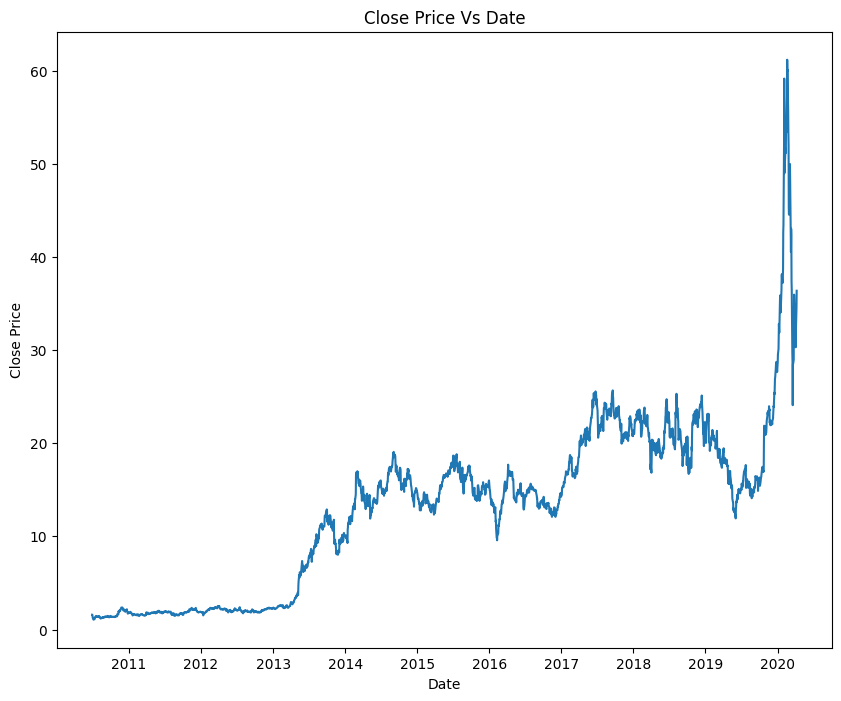

In [12]:
plt.figure(figsize=[10,8])                                   # Setting the figure size
plt.plot(stocks_df['Close'])                                 # Plotting the close price
plt.xlabel("Date")                                           # Setting the label in x-axis
plt.ylabel("Close Price")                                    # Setting the label in y-axis
plt.title("Close Price Vs Date")                             # Title
plt.show()

Calculate the percentage change

In [13]:
data_pc = df.Close.pct_change()
data_pc.head()

Date
2010-06-29         NaN
2010-06-30   -0.002511
2010-07-01   -0.078473
2010-07-02   -0.125683
2010-07-06   -0.160937
Name: Close, dtype: float64

<Axes: xlabel='Date'>

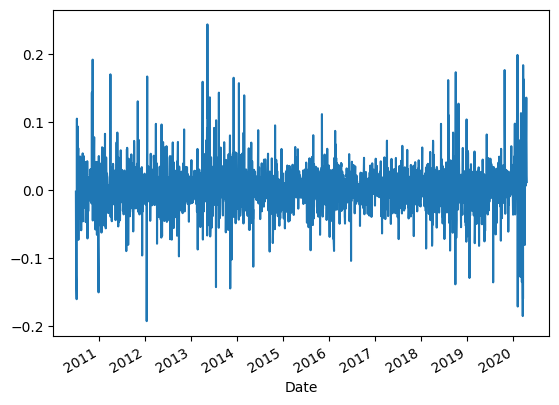

In [14]:
data_pc.plot()

under standing the perfomance of Tesla when 'WHO' declared 'Emergency' and 'Pandemic'

In [15]:
columns_1 = ['pandemic_name','first_case','who_emergency','pandemic_declaration','last_date']
ro_list = [['covid19',datetime.strptime('2019-11-17', '%Y-%m-%d'),datetime.strptime('2020-01-30', '%Y-%m-%d'),datetime.strptime('2020-03-11', '%Y-%m-%d'),datetime.strptime('2020-07-31', '%Y-%m-%d')]]
covid_timelines = pd.DataFrame(ro_list,columns = columns_1)
covid_timelines

,pandemic_name,first_case,who_emergency,pandemic_declaration,last_date
0,covid19,2019-11-17,2020-01-30,2020-03-11,2020-07-31


Ploting Tesla performance based on timelines 'Sector wise' and 'Index wise'

In [16]:
def plot_cumulative_returns(data,tl):
    data_cum_ret = (data.pct_change()+1).cumprod()
    data_cum_ret.plot(figsize=(10,7),grid=True)
    plt.legend(loc='best')
    plt.ylabel('Cumulative Returns')
    plt.axvline(x=tl.first_case.iloc[0],color='RoyalBlue',linestyle='dashdot',linewidth=3)
    plt.axvline(x=tl.who_emergency.iloc[0],color='Red',linestyle='dashdot',linewidth=3)
    plt.axvline(x=tl.pandemic_declaration.iloc[0],color='LightSeaGreen',linestyle='dashdot',linewidth=3)
    plt.axvspan(tl.last_date.iloc[0], tl.last_date.iloc[0]+timedelta(days=365),color='dodgerblue', alpha=0.2)
    plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


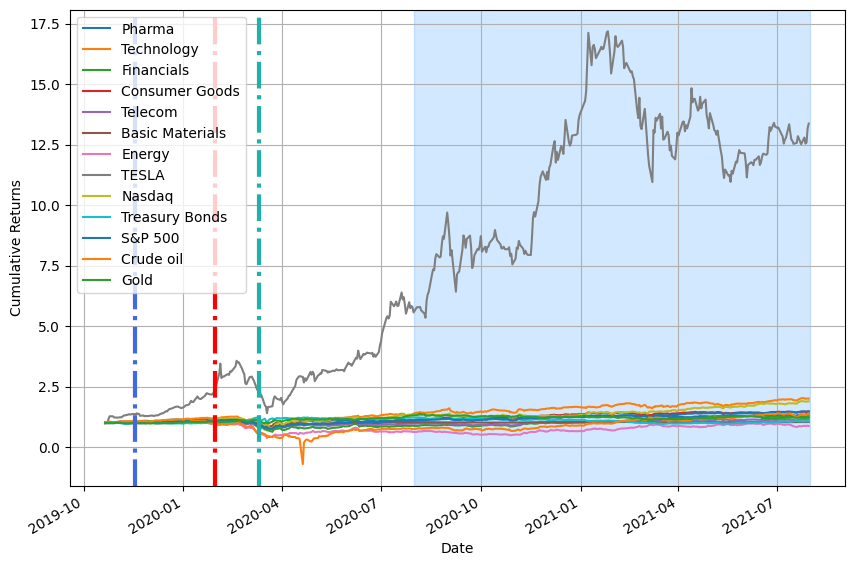

In [17]:
def plot_sector(tl):
    sector_list = ['IHE', 'IYW', 'IYF', 'IYK', 'IYZ','ITM', 'IYE','TSLA','NDAQ','TLT','^GSPC', 'CL=F','GC=F']

    columns = ['Pharma', 'Technology', 'Financials', 'Consumer Goods',
               'Telecom', 'Basic Materials', 'Energy','TESLA','Nasdaq','Treasury Bonds','S&P 500','Crude oil','Gold']

    sector_data = pd.DataFrame()
    for inst in sector_list:
        try:
            sector_data[inst] = pdr.get_data_yahoo(inst, tl.first_case.iloc[0]-timedelta(days=30),
                                        tl.last_date.iloc[0]+timedelta(days=365))['Close']
        except:
            pass
    sector_data.columns = columns
    plot_cumulative_returns(sector_data, tl)
plot_sector(covid_timelines)


It can be concluded that TESLA out performed 'All Sectors' and 'All Indexes'

4. Importing more packages for prediction

In [18]:
from keras.models import Sequential                   # Sequential model
from keras.layers import Dense                        # For fully connected layers
from keras.layers import LSTM                         # For LSTM layers
from sklearn.preprocessing import MinMaxScaler        # Scaling the data
min_max_scaler = MinMaxScaler()

In [19]:
len(stocks_df)

2461

Checking for null values

In [20]:
stocks_df.isnull().sum()                                 # There are no null values in the dataframe

Close    0
dtype: int64

6. Train Test Split
Lets make prediction for 30 days

In [21]:
prediction_days = 30
ts_train= stocks_df[prediction_days:]       # Remove 30 days from the end for Training data
ts_test= stocks_df[:prediction_days]        # Last 30 days values for test

In [22]:
ts_train.shape                                             # Checking the number of rows in train data

(2431, 1)

In [23]:
ts_test.shape                                              # Checking the number of rows in test data

(30, 1)

In [24]:
ts_test

,Close
Date,
2020-04-07,36.363335
2020-04-06,34.416000
2020-04-03,32.000668
2020-04-02,30.298000
2020-04-01,32.104000
2020-03-31,34.933334
2020-03-30,33.475334
2020-03-27,34.290668
2020-03-26,35.210667


In [25]:
# Scaling the train data

training_set=ts_train.values
training_set = min_max_scaler.fit_transform(training_set)

Defining our X and y
X is our inputs which is the training data.
y is the output, which is training data shifted by 1.

For a given day, we want to predict the stock value for the next day.

In [26]:
x_train=training_set[0:len(training_set)-1]
y_train=training_set[1:len(training_set)]

In [27]:
x_train[:5]                                                  # Checking the first 5 rows of the scaled training data

array([[0.86966793],
       [0.90724475],
       [0.98178835],
       [0.98002488],
       [1.        ]])

In [28]:
y_train[:5]                                                  # Checking the first 5 rows of the scaled test data

array([[0.90724475],
       [0.98178835],
       [0.98002488],
       [1.        ],
       [0.93454006]])

In [29]:
len(x_train)                                                 # We should have same number of records in x_train and y_train

2430

In [30]:
len(y_train)

2430

6.Building our model

In [31]:
x_train = np.reshape(x_train, (len(x_train), 1, 1))          # We need to reshape the data before it is passed to the model

In [32]:
num_units = 32
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 50

In [33]:
# Training the data from 2010-06-29 to 2020-04-17

regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
regressor.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs)

Epoch 1/50
486/486 [==============================] - 2s 2ms/step - loss: 0.0212
Epoch 2/50
486/486 [==============================] - 1s 2ms/step - loss: 0.0067
Epoch 3/50
486/486 [==============================] - 1s 2ms/step - loss: 0.0019
Epoch 4/50
486/486 [==============================] - 1s 2ms/step - loss: 3.0774e-04
Epoch 5/50
486/486 [==============================] - 1s 2ms/step - loss: 9.8891e-05
Epoch 6/50
486/486 [==============================] - 1s 2ms/step - loss: 8.8998e-05
Epoch 7/50
486/486 [==============================] - 1s 2ms/step - loss: 9.3127e-05
Epoch 8/50
486/486 [==============================] - 1s 2ms/step - loss: 9.5898e-05
Epoch 9/50
486/486 [==============================] - 1s 2ms/step - loss: 9.1656e-05
Epoch 10/50
486/486 [==============================] - 1s 3ms/step - loss: 9.8897e-05
Epoch 11/50
486/486 [==============================] - 2s 3ms/step - loss: 9.5554e-05
Epoch 12/50
486/486 [==============================] - 1s 2ms/step - loss: 

7. Prediction on ts_test ¶

In [34]:
# We are going to make prediction from 2020-02-26 to 2020-04-07

# Preprocess the test data

test_set = ts_test.values

inputs = np.reshape(test_set, (len(test_set), 1))                        # Reshape before passing in the input
inputs = min_max_scaler.transform(inputs)                                # Scaling the data
inputs = np.reshape(inputs, (len(inputs), 1, 1))

predicted_price = regressor.predict(inputs)                              # Make predictions on the test data
predicted_price = min_max_scaler.inverse_transform(predicted_price)      # Inverse transform the predicted price

1/1 [==============================] - 0s 195ms/step


In [35]:
# This is the close price of stocks for 30 days
predicted_price

array([[36.45832 ],
       [34.54215 ],
       [32.15651 ],
       [30.469189],
       [32.258755],
       [35.051853],
       [33.614193],
       [34.4186  ],
       [35.324905],
       [36.052162],
       [33.803062],
       [29.13291 ],
       [28.684704],
       [28.691998],
       [24.273975],
       [28.86177 ],
       [29.847069],
       [36.534924],
       [37.4462  ],
       [42.238434],
       [42.956097],
       [40.537945],
       [46.696003],
       [48.041924],
       [49.630882],
       [49.377335],
       [49.257183],
       [44.417492],
       [45.125717],
       [51.4873  ]], dtype=float32)

In [36]:
error=predicted_price-test_set    # Calculate the error

In [37]:
# Lets have a look at the error values
error

array([[ 0.09498596],
       [ 0.12614822],
       [ 0.15584183],
       [ 0.17118835],
       [ 0.15475464],
       [ 0.11851883],
       [ 0.1388588 ],
       [ 0.12792969],
       [ 0.11423874],
       [ 0.10216141],
       [ 0.1363945 ],
       [ 0.18024254],
       [ 0.18270302],
       [ 0.18266487],
       [ 0.19264221],
       [ 0.18177032],
       [ 0.17573547],
       [ 0.09358978],
       [ 0.07620239],
       [-0.04356766],
       [-0.06590271],
       [ 0.00461197],
       [-0.20266342],
       [-0.26074219],
       [-0.33578491],
       [-0.32333374],
       [-0.31748581],
       [-0.11517334],
       [-0.14094925],
       [-0.4326973 ]])

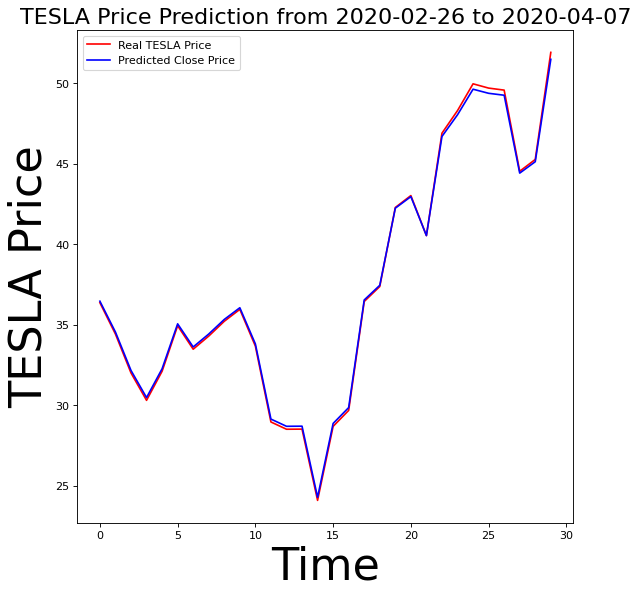

In [38]:
# Plot the Actual price and the predicted price

plt.figure(figsize=(8, 8), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(test_set[:, 0], color='red', label='Real TESLA Price')                      # Actual Price
plt.plot(predicted_price[:, 0], color = 'blue', label = 'Predicted Close Price')      # Predicted Price

plt.title('TESLA Price Prediction from 2020-02-26 to 2020-04-07', fontsize = 20)
plt.xlabel('Time', fontsize=40)
plt.ylabel('TESLA Price', fontsize = 40)
plt.legend(loc = 'best')
plt.show()

8. Prediction with test data

In [39]:
Test_data
test_data1 = Test_data.iloc[:,0]
test_data1

Date
2020-04-17    50.259335
2020-04-16    49.680668
2020-04-15    48.655334
2020-04-14    47.326000
2020-04-13    43.396667
2020-04-09    38.200001
2020-04-08    36.589333
Name: Close, dtype: float64

We need to perform feature engineering on the test price before we can make predictions from the model

In [40]:
test_data1=np.array(test_data1)

In [41]:
test_data1 =test_data1.reshape(-1,1)                               # Reshape the data before you feed into the model

In [42]:
test_input=min_max_scaler.transform(test_data1)                    # Scale the data

In [43]:
test_input.shape

(7, 1)

In [44]:
test_input=np.reshape(test_input, (len(test_input), 1, 1))

In [45]:
test_prediction=regressor.predict(test_input)                          # Make predictions for the test data

1/1 [==============================] - 0s 19ms/step


In [46]:
test_prediction=min_max_scaler.inverse_transform(test_prediction)      # Inverse transform the predictions

In [47]:
test_prediction

array([[49.909645],
       [49.35827 ],
       [48.379246],
       [47.10616 ],
       [43.31902 ],
       [38.2593  ],
       [36.680267]], dtype=float32)

In [48]:
Test_data.iloc[:,0]

Date
2020-04-17    50.259335
2020-04-16    49.680668
2020-04-15    48.655334
2020-04-14    47.326000
2020-04-13    43.396667
2020-04-09    38.200001
2020-04-08    36.589333
Name: Close, dtype: float64